# Setup 

In [222]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [259]:
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=20)
y = np.where(y == 0, -1, 1)

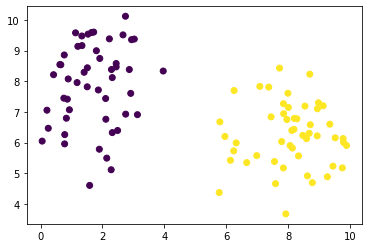

In [260]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

# Support Vector Machine 

Maximize margin between classes. 

Hinge loss

$$
\ cond = (wX - b)y >=1 \\
$$


                                                        If cond is true
$$
L = 0
$$

                                                        If cond is false

$$
L = 1 - (wX - b)y
$$

Cost function

$$
J = ||w||^{2} + \frac{1}{m}\sum_{i = 1}^{i = m}\max(0,1-(wx_{i}-b)y_{i})\\
$$

                                                        If cond is true
$$
J_{i} = ||w||^{2} 
$$

                                                        If cond is false
                                                        
$$
J_{i} = ||w||^{2} + 1 - (wx_{i} - b)y_{i}
$$


Gradients

                                                        If cond is true
$$
\frac{\partial}{\partial w} = 2w \\
\frac{\partial}{\partial b} = 0 \\
$$

                                                        If cond is false
$$
\frac{\partial}{\partial w} = 2w - x_{i}y_{i} \\
\frac{\partial}{\partial b} = y_{i} \\
$$

Step function

                                                        If cond it true
$$
w = w - \alpha * \frac{\partial}{\partial w}
$$
  
                                                        If cond it false
$$
w = w - \alpha * \frac{\partial}{\partial w}\\
b = b - \alpha * \frac{\partial}{\partial b}
$$

In [261]:
w = np.zeros(len(X[0]))
b = 0
alpha = 0.001
epochs = 100
lambda_ = 0.01 #need some regularization, or feature scaling

for epoch in range(1,epochs):
    for i, x in enumerate(X):
        cond = y[i] * (np.dot(x, w) -b) >= 1
        if cond:
            w = w - alpha * (2*lambda_*w)
        else:
            w = w - alpha * (2*lambda_*w - np.dot(x,y[i]))
            b = b - alpha * (y[i])

In [262]:
w, b

(array([ 0.7542755 , -0.47375903]), 0.11800000000000009)

In [263]:
def predict(X):
    return np.sign(np.dot(X,w) - b)

pred = predict(X)

In [264]:
correct = 0
for i1, i2 in zip(pred,y):
    if i1 == i2:
        correct += 1
print(f"Accuracy: {correct / len(y) * 100}%")

Accuracy: 100.0%


In [265]:
def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]

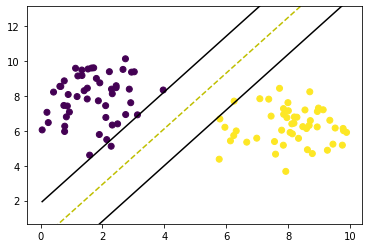

In [266]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

x1_1 = get_hyperplane_value(x0_1, w, b, 0)
x1_2 = get_hyperplane_value(x0_2, w, b, 0)

x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

plt.show()